<a href="https://colab.research.google.com/github/minhyeok2001/Computer-Vision/blob/main/upsampling_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
# MNIST 데이터셋 다운로드 및 변환
transform = transforms.Compose([transforms.ToTensor()])
mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# UPSAMPLING BASIC


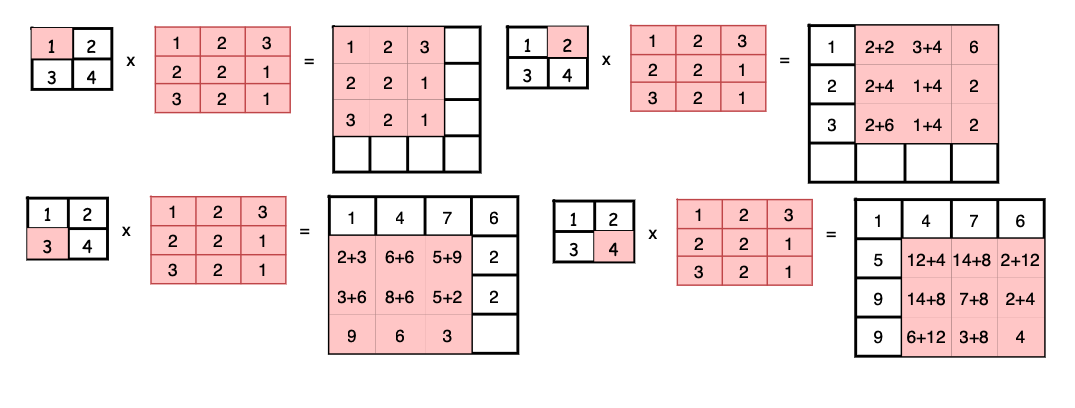

- element-wise로 곱하고, 겹치는부분은 합침
- 여기서 padding은 0으로 늘리는게 아니라, padding 만큼 자르는거임 !! ( 일반 padding의 반대 )

Input Tensor Shape: torch.Size([1, 1, 28, 28])
Output Tensor Shape: torch.Size([1, 1, 56, 56])


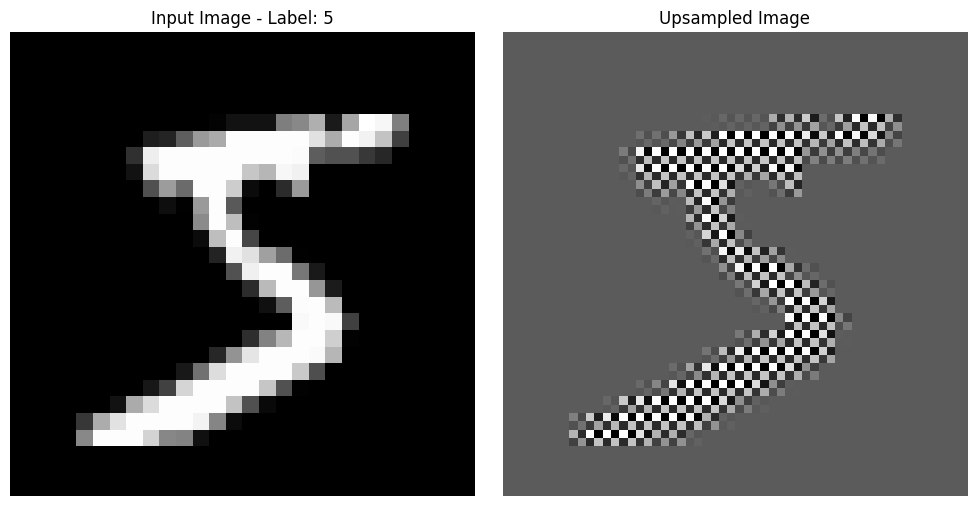

In [9]:
import torch
import torch.nn as nn


# MNIST에서 첫 번째 이미지 가져오기
input_image, label = mnist_data[0]  # 첫 번째 데이터 (이미지와 라벨)
input_tensor = input_image.unsqueeze(0)  # [28, 28] -> [1, 1, 28, 28]

# ConvTranspose2d 설정 (업샘플링)
transp = nn.ConvTranspose2d(
    in_channels=1,
    out_channels=1,
    kernel_size=2,
    stride=2
)

# 업샘플링 실행
output_tensor = transp(input_tensor)

# 결과 출력
print(f"Input Tensor Shape: {input_tensor.shape}")  # [1, 1, 28, 28]
print(f"Output Tensor Shape: {output_tensor.shape}")  # [1, 1, 56, 56]

# 시각화
plt.figure(figsize=(10, 5))

# 입력 이미지
plt.subplot(1, 2, 1)
plt.title(f"Input Image - Label: {label}")
plt.imshow(input_tensor[0, 0].detach().numpy(), cmap='gray')  # [1, 1, 28, 28] -> [28, 28]
plt.axis('off')

# 업샘플링된 이미지
plt.subplot(1, 2, 2)
plt.title("Upsampled Image")
plt.imshow(output_tensor[0, 0].detach().numpy(), cmap='gray')  # [1, 1, 56, 56] -> [56, 56]
plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
print("Weight shape:", transp.weight.shape)
print("Weight values:")
print(transp.weight)

print("\nBias shape:", transp.bias.shape)
print("Bias values:")
print(transp.bias)

Weight shape: torch.Size([1, 1, 2, 2])
Weight values:
Parameter containing:
tensor([[[[ 0.4769, -0.2667],
          [-0.1440,  0.3032]]]], requires_grad=True)

Bias shape: torch.Size([1])
Bias values:
Parameter containing:
tensor([-0.1382], requires_grad=True)
